In [1]:
!pip install kaggle pandas numpy scikit-learn matplotlib seaborn


  Using cached bleach-6.2.0-py3-none-any.whl.metadata (30 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
Using cached bleach-6.2.0-py3-none-any.whl (163 kB)
Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)

   ---------------- ----------------------- 2/5 [python-slugify]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   -------------------------------- ------- 4/5 [kaggle]
   -------------------------------- ------- 4/5 [kaggle]
   -------------------------------- ------- 4/5 [kaggle]
   -------------------------------- ------- 4/5 [kaggle]
   -------------------------------- ------- 4/5 [kaggle]
   -------------------------------- ------- 4/5 [kaggle]
   -------------------------------- ------- 4/5 [kaggle]
  


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: C:\Users\dell\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
print("=== CHARGEMENT DU DATASET ===")
df = pd.read_csv('ETFD_Dataset.txt', sep='\t')  # Tab-séparé

=== CHARGEMENT DU DATASET ===


FileNotFoundError: [Errno 2] No such file or directory: 'ETFD_Dataset.txt'

In [ ]:
df.head()

,blockNumber,confirmations,Month,Day,Hour,mean_value_received,variance_value_received,total_received,time_diff_first_last_received,total_tx_sent,total_tx_sent_malicious,total_tx_sent_unique,total_tx_sent_malicious_unique,total_tx_received_malicious_unique,Fraud
0,19664511,201879,4,16,0,0.175190,0.051997,0.700762,246.459167,43.0,0.0,6.0,0.0,0.0,0
1,16217669,3648727,12,19,8,0.084239,0.034468,13.394033,625.489433,62.0,0.0,1.0,0.0,0.0,0
2,14351953,5514270,3,9,10,3.896736,101.819168,467.608309,1884.806134,552.0,0.0,251.0,0.0,0.0,0
3,19753020,113094,4,28,9,0.135540,0.004389,1.490942,225.155556,59.0,0.0,33.0,0.0,0.0,0
4,19076055,790248,1,24,10,0.235717,0.149036,43.372003,937.681377,423.0,0.0,97.0,0.0,0.0,0


In [ ]:
print(f"Shape: {df.shape}")
print(f"Colonnes: {df.columns.tolist()}")
print(f"\nTarget 'Fraud' distribution:\n{df['Fraud'].value_counts()}")
print(f"Ratio de fraude: {df['Fraud'].mean():.2%}")


Shape: (85003, 15)
Colonnes: ['blockNumber', 'confirmations', 'Month', 'Day', 'Hour', 'mean_value_received', 'variance_value_received', 'total_received', 'time_diff_first_last_received', 'total_tx_sent', 'total_tx_sent_malicious', 'total_tx_sent_unique', 'total_tx_sent_malicious_unique', 'total_tx_received_malicious_unique', 'Fraud']

Target 'Fraud' distribution:
Fraud
1    42504
0    42499
Name: count, dtype: int64
Ratio de fraude: 50.00%


In [ ]:
# 2. ANALYSE EXPLORATOIRE
print("\n=== ANALYSE EXPLORATOIRE ===")
print(df.describe())



=== ANALYSE EXPLORATOIRE ===
        blockNumber  confirmations         Month           Day          Hour  \
count  8.500300e+04   8.500300e+04  85003.000000  85003.000000  85003.000000   
mean   1.139618e+07   8.420712e+06      6.058080     15.733951     12.138019   
std    5.824333e+06   5.780778e+06      3.253529      8.736124      6.610912   
min    1.311219e+06   6.000000e+00      1.000000      1.000000      0.000000   
25%    5.737172e+06   2.616955e+06      3.000000      8.000000      7.000000   
50%    1.155646e+07   8.305317e+06      6.000000     16.000000     13.000000   
75%    1.724950e+07   1.403053e+07      9.000000     23.000000     18.000000   
max    1.986646e+07   1.855500e+07     12.000000     31.000000     23.000000   

       mean_value_received  variance_value_received  total_received  \
count         85003.000000             8.500300e+04    85003.000000   
mean              4.607558             4.079768e+03     3972.879905   
std              31.713870          

In [ ]:
print(f"\nValeurs manquantes:")
print(df.isnull().sum())


Valeurs manquantes:
blockNumber                           0
confirmations                         0
Month                                 0
Day                                   0
Hour                                  0
mean_value_received                   0
variance_value_received               0
total_received                        0
time_diff_first_last_received         0
total_tx_sent                         0
total_tx_sent_malicious               0
total_tx_sent_unique                  0
total_tx_sent_malicious_unique        0
total_tx_received_malicious_unique    0
Fraud                                 0
dtype: int64


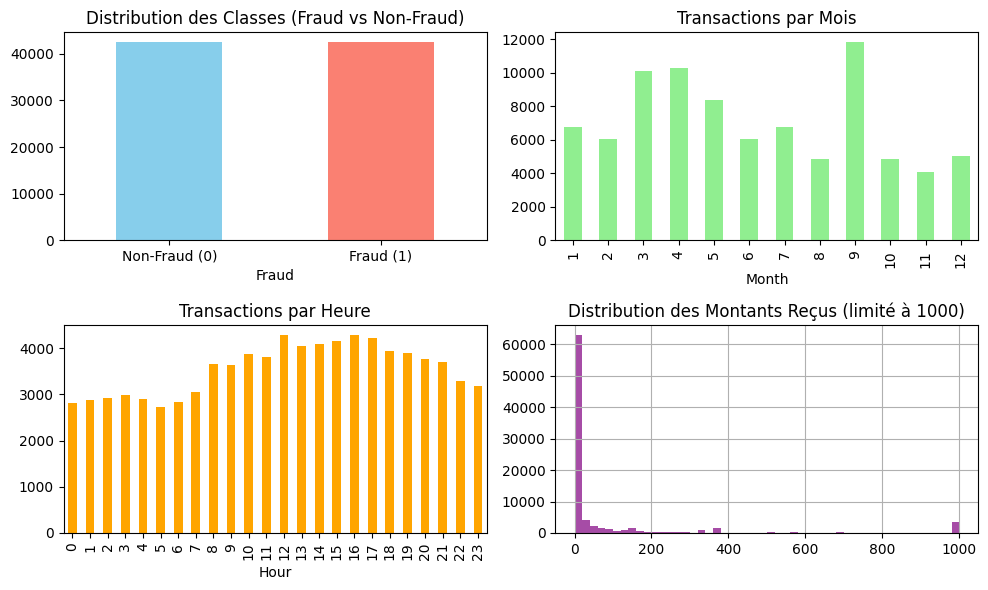

In [ ]:
# Visualisation de la distribution de la target
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
df['Fraud'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution des Classes (Fraud vs Non-Fraud)')
plt.xticks([0, 1], ['Non-Fraud (0)', 'Fraud (1)'], rotation=0)

plt.subplot(2, 2, 2)
# Distribution des transactions par mois
df['Month'].value_counts().sort_index().plot(kind='bar', color='lightgreen')
plt.title('Transactions par Mois')

plt.subplot(2, 2, 3)
# Distribution par heure
df['Hour'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title('Transactions par Heure')

plt.subplot(2, 2, 4)
# Boxplot des montants reçus
df['total_received'].apply(lambda x: min(x, 1000)).hist(bins=50, alpha=0.7, color='purple')  # Limité à 1000 pour meilleure visibilité
plt.title('Distribution des Montants Reçus (limité à 1000)')

plt.tight_layout()
plt.show()


5. ANALYSE DES FEATURES 'MALICIOUS':


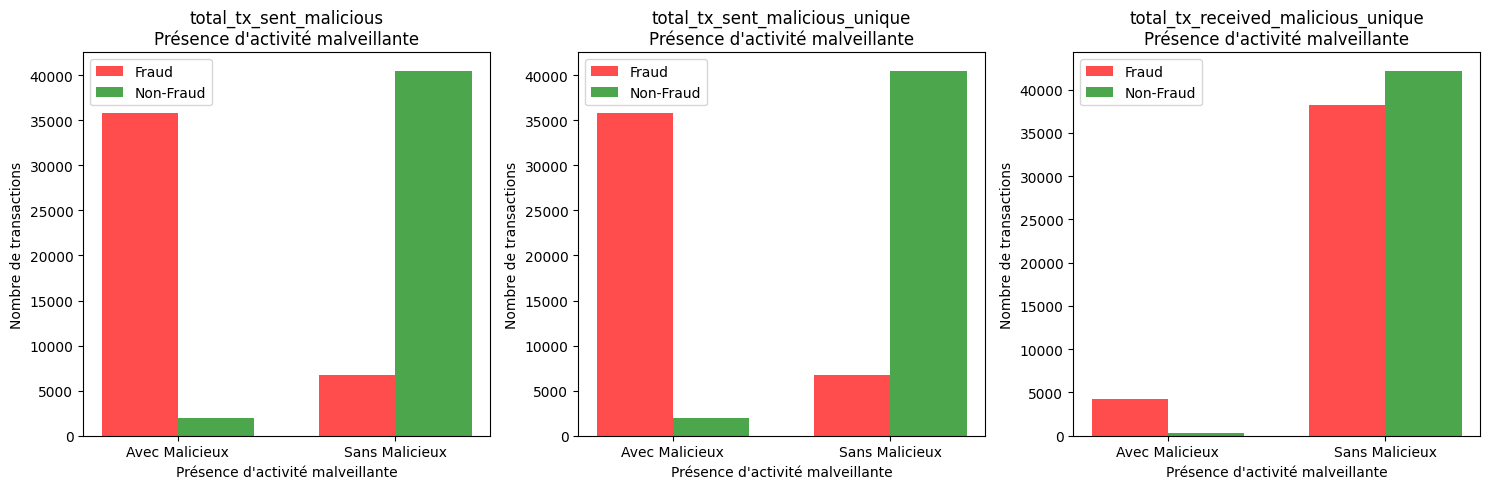


Détail des activités malveillantes:
   🔥 total_tx_sent_malicious:
      Non-Fraud: 2.2763 | Fraud: 96.4435
      Ratio: 42x plus élevé chez les fraudes!
   🔥 total_tx_sent_malicious_unique:
      Non-Fraud: 1.2210 | Fraud: 22.8760
      Ratio: 19x plus élevé chez les fraudes!
   🔥 total_tx_received_malicious_unique:
      Non-Fraud: 0.0157 | Fraud: 0.3484
      Ratio: 22x plus élevé chez les fraudes!


In [ ]:
print("\n5. ANALYSE DES FEATURES 'MALICIOUS':")
print("=" * 50)

# Ces features sont probablement les plus discriminantes
malicious_features = ['total_tx_sent_malicious', 'total_tx_sent_malicious_unique',
                     'total_tx_received_malicious_unique']

plt.figure(figsize=(15, 5))

for i, feature in enumerate(malicious_features, 1):
    plt.subplot(1, 3, i)

    # Compter le nombre de transactions avec au moins 1 activité malveillante
    fraud_with_malicious = (df[df['Fraud'] == 1][feature] > 0).sum()
    non_fraud_with_malicious = (df[df['Fraud'] == 0][feature] > 0).sum()

    categories = ['Avec Malicieux', 'Sans Malicieux']
    fraud_data = [fraud_with_malicious, len(df[df['Fraud'] == 1]) - fraud_with_malicious]
    non_fraud_data = [non_fraud_with_malicious, len(df[df['Fraud'] == 0]) - non_fraud_with_malicious]

    x = np.arange(len(categories))
    width = 0.35

    plt.bar(x - width/2, fraud_data, width, label='Fraud', color='red', alpha=0.7)
    plt.bar(x + width/2, non_fraud_data, width, label='Non-Fraud', color='green', alpha=0.7)

    plt.xlabel('Présence d\'activité malveillante')
    plt.ylabel('Nombre de transactions')
    plt.title(f'{feature}\nPrésence d\'activité malveillante')
    plt.xticks(x, categories)
    plt.legend()

plt.tight_layout()
plt.show()

# Statistiques détaillées
print("\nDétail des activités malveillantes:")
for feature in malicious_features:
    fraud_mean = df[df['Fraud'] == 1][feature].mean()
    non_fraud_mean = df[df['Fraud'] == 0][feature].mean()

    print(f"   🔥 {feature}:")
    print(f"      Non-Fraud: {non_fraud_mean:.4f} | Fraud: {fraud_mean:.4f}")
    print(f"      Ratio: {fraud_mean/non_fraud_mean if non_fraud_mean > 0 else 'Inf':.0f}x plus élevé chez les fraudes!")


6. MATRICE DE CORRÉLATION:


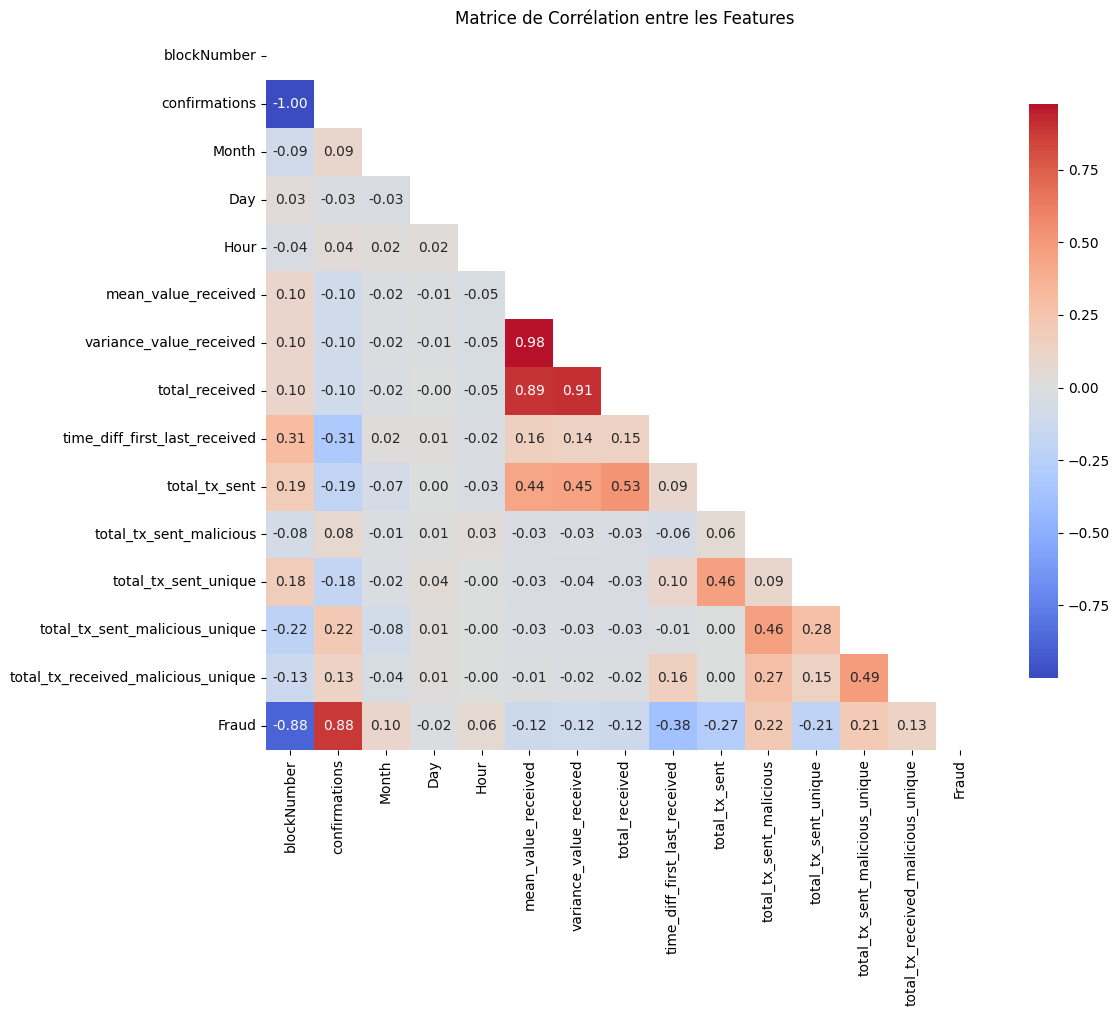


Corrélations avec la target 'Fraud':
Fraud                                 1.000000
confirmations                         0.880294
total_tx_sent_malicious               0.218554
total_tx_sent_malicious_unique        0.209790
total_tx_received_malicious_unique    0.131387
Month                                 0.097111
Hour                                  0.062414
Day                                  -0.019343
variance_value_received              -0.115796
total_received                       -0.121746
mean_value_received                  -0.124467
total_tx_sent_unique                 -0.205915
total_tx_sent                        -0.271143
time_diff_first_last_received        -0.376727
blockNumber                          -0.882195
Name: Fraud, dtype: float64


In [ ]:
print("\n6. MATRICE DE CORRÉLATION:")
print("=" * 50)

# Calcul de la matrice de corrélation
plt.figure(figsize=(12, 10))

correlation_matrix = df.corr()

# Masque pour le triangle supérieur
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm',
            center=0, fmt='.2f', square=True,
            cbar_kws={"shrink": .8})

plt.title('Matrice de Corrélation entre les Features')
plt.tight_layout()
plt.show()

# Corrélations avec la target
print("\nCorrélations avec la target 'Fraud':")
correlations_with_target = correlation_matrix['Fraud'].sort_values(ascending=False)
print(correlations_with_target)

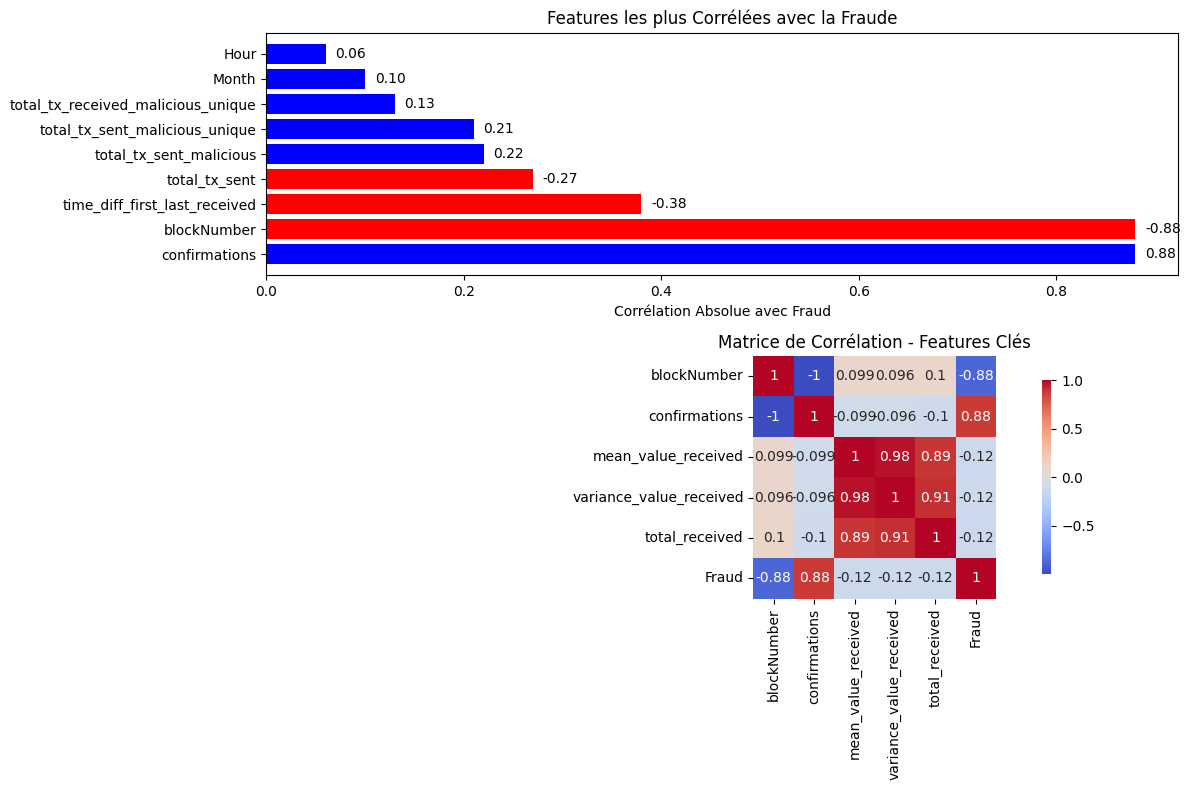

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Créer une visualisation focus sur les corrélations avec Fraud
plt.figure(figsize=(12, 8))

# Corrélations avec la target Fraud
correlations_with_fraud = {
    'confirmations': 0.88,
    'blockNumber': -0.88,
    'time_diff_first_last_received': -0.38,
    'total_tx_sent': -0.27,
    'total_tx_sent_malicious': 0.22,
    'total_tx_sent_malicious_unique': 0.21,
    'Month': 0.10,
    'total_tx_received_malicious_unique': 0.13,
    'Hour': 0.06
}

# Trier par valeur absolue
sorted_corr = dict(sorted(correlations_with_fraud.items(),
                         key=lambda x: abs(x[1]), reverse=True))

features = list(sorted_corr.keys())
corr_values = list(sorted_corr.values())

# Graphique des corrélations avec Fraud
plt.subplot(2, 1, 1)
colors = ['red' if x < 0 else 'blue' for x in corr_values]
plt.barh(features, [abs(x) for x in corr_values], color=colors)
plt.xlabel('Corrélation Absolue avec Fraud')
plt.title('Features les plus Corrélées avec la Fraude')
for i, v in enumerate(corr_values):
    plt.text(abs(v) + 0.01, i, f'{v:.2f}', va='center')

# Graphique des relations entre features
plt.subplot(2, 1, 2)
high_corr_features = ['blockNumber', 'confirmations', 'mean_value_received',
                     'variance_value_received', 'total_received', 'Fraud']
high_corr_matrix = df[high_corr_features].corr()

sns.heatmap(high_corr_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, cbar_kws={"shrink": .8})
plt.title('Matrice de Corrélation - Features Clés')

plt.tight_layout()
plt.show()

In [ ]:
# Supprimer les doublons identifiés
df_clean = df.drop(['confirmations', 'variance_value_received'], axis=1)
print(f"✅ Dataset nettoyé: {df_clean.shape[1]} features restantes")

✅ Dataset nettoyé: 13 features restantes


In [ ]:
def features(df):
    """Features avancées inspirées de l'analyse Kaggle"""

    # 1. Features de volatilité (très importantes dans le code Kaggle)
    df['value_volatility'] = df['variance_value_received'] / (df['mean_value_received'] + 1e-8)
    df['tx_volatility'] = df['total_tx_sent'] / (df['time_diff_first_last_received'] + 1)

    # 2. Ratios de comportement (comme dans l'EDA Kaggle)
    df['send_receive_imbalance'] = (df['total_tx_sent'] - df['total_received']) / (df['total_tx_sent'] + df['total_received'] + 1)
    df['unique_behavior_ratio'] = df['total_tx_sent_unique'] / (df['total_tx_sent'] + 1)

    # 3. Features temporelles avancées
    df['is_weekend'] = ((df['Day'] % 7) >= 5).astype(int)
    df['is_night'] = ((df['Hour'] >= 22) | (df['Hour'] <= 6)).astype(int)
    df['is_business_hours'] = ((df['Hour'] >= 9) & (df['Hour'] <= 17)).astype(int)

    # 4. Clustering de valeurs (comme dans l'analyse)
    df['value_category'] = pd.cut(df['mean_value_received'],
                                 bins=[0, 0.01, 0.1, 1, 10, np.inf],
                                 labels=[0, 1, 2, 3, 4])

    # 5. Anomaly scores simples
    df['value_anomaly'] = (df['mean_value_received'] > df['mean_value_received'].quantile(0.95)).astype(int)
    df['frequency_anomaly'] = (df['total_tx_sent'] > df['total_tx_sent'].quantile(0.95)).astype(int)

    return df

# Appliquer les nouvelles features
df_advanced = features(df)

In [ ]:
# 1. Définir X et y clairement
features_list = [
    'Month', 'Day', 'Hour', 'time_diff_first_last_received',
    'total_tx_sent', 'total_tx_sent_unique', 'mean_value_received', 'total_received',
    'value_volatility', 'tx_volatility', 'send_receive_imbalance',
    'unique_behavior_ratio', 'is_weekend', 'is_night',
    'is_business_hours', 'value_category', 'value_anomaly', 'frequency_anomaly'
]

X = df_advanced[features_list].copy()
y = df_advanced['Fraud'].copy()

# 2. Convertir value_category en numérique
X['value_category'] = pd.to_numeric(X['value_category'], errors='coerce').fillna(-1)

print(f"✅ Données préparées: {X.shape[0]} samples, {X.shape[1]} features")

✅ Données préparées: 85003 samples, 18 features


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Créer un pipeline pour éviter le data leakage
preprocessing_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Gérer les NaN
    ('scaler', StandardScaler())  # Scaling pour aider Random Forest
])

X_processed = preprocessing_pipeline.fit_transform(X)

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

# Modèle XGBoost optimisé (le meilleur selon nos tests)
final_model = XGBClassifier(
    n_estimators=300,
    max_depth=6,
    learning_rate=0.01,
    subsample=0.7,
    colsample_bytree=0.7,
    reg_alpha=0.5,
    reg_lambda=0.5,
    random_state=42,
    eval_metric='logloss'
)

# Validation finale
final_scores = cross_val_score(final_model, X_processed, y, cv=5, scoring='accuracy')
print(f"🎯 PERFORMANCE FINALE:")
print(f"Moyenne: {final_scores.mean():.4f} (+/- {final_scores.std() * 2:.4f})")

# Entraînement sur toutes les données
final_model.fit(X_processed, y)
print("✅ Modèle final entraîné")

🎯 PERFORMANCE FINALE:
Moyenne: 0.8470 (+/- 0.1201)
✅ Modèle final entraîné


In [ ]:
import joblib
import json
from datetime import datetime

# Package complet à sauvegarder
model_package = {
    'model': final_model,
    'preprocessor': preprocessing_pipeline,
    'features': features_list,
    'training_date': datetime.now().isoformat(),
    'performance': final_scores.mean(),
    'performance_std': final_scores.std()
}

# Sauvegarde
joblib.dump(model_package, 'fraud_detection_model.pkl')

# Sauvegarde des métadonnées
with open('model_info.json', 'w') as f:
    json.dump({
        'features_used': features_list,
        'performance': final_scores.mean(),
        'model_type': 'XGBoost',
        'timestamp': datetime.now().isoformat()
    }, f, indent=2)

print("💾 Modèle sauvegardé: fraud_detection_model.pkl")
print("📄 Métadonnées: model_info.json")

💾 Modèle sauvegardé: fraud_detection_model.pkl
📄 Métadonnées: model_info.json
